#### 结合归一化和正则化来优化网络模型结构，观察对比loss结果

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


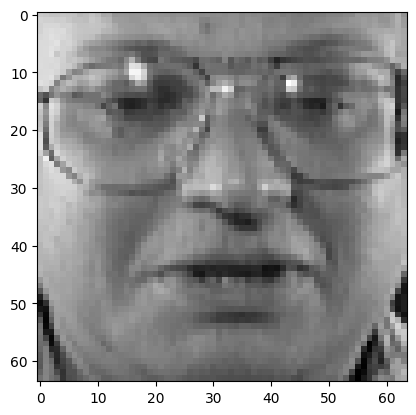

In [4]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [5]:
olivetti_faces.data[1]

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], dtype=float32)

In [6]:
import torch
import torch.nn as nn

In [7]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)

In [8]:
images.shape

torch.Size([400, 4096])

In [9]:
targets.shape

torch.Size([400])

In [10]:
dataset = [(img,lbl) for img,lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]), tensor(13))

In [11]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [12]:
# device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [33]:
# 多层神经网络模型
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(8192, 16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024, 40)
).to(device)  # 模型结构搬到GPU内存中

In [34]:
print(model)

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=8192, out_features=16384, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=16384, out_features=1024, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=1024, out_features=40, bias=True)
)


In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [36]:
loss_hist = []
model.train()
for i in range(20):
    for img,lbl in dataloader:
        img,lbl = img.to(device), lbl.to(device)  # 数据和模型在同一个设备端
        result = model(img)
        loss = criterion(result, lbl)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist.append(loss.item())
        print(f'epoch:{i+1} loss:{loss.item():.4f}')

epoch:1 loss:3.6615
epoch:1 loss:25.2169
epoch:1 loss:14.7627
epoch:1 loss:4.9499
epoch:1 loss:5.2105
epoch:1 loss:3.7764
epoch:1 loss:4.3150
epoch:1 loss:4.0095
epoch:1 loss:3.6003
epoch:1 loss:3.9344
epoch:1 loss:3.6945
epoch:1 loss:3.8454
epoch:1 loss:3.7970
epoch:1 loss:3.8686
epoch:1 loss:3.7207
epoch:1 loss:3.6741
epoch:1 loss:3.7630
epoch:1 loss:3.9462
epoch:1 loss:3.8092
epoch:1 loss:3.8287
epoch:1 loss:3.7577
epoch:1 loss:3.7350
epoch:1 loss:3.7110
epoch:1 loss:3.7888
epoch:1 loss:3.8187
epoch:1 loss:3.9315
epoch:1 loss:3.8153
epoch:1 loss:3.7940
epoch:1 loss:3.6994
epoch:1 loss:3.9290
epoch:1 loss:3.8611
epoch:1 loss:3.7491
epoch:1 loss:3.8174
epoch:1 loss:3.7402
epoch:1 loss:3.7471
epoch:1 loss:3.7174
epoch:1 loss:3.7476
epoch:1 loss:3.8001
epoch:1 loss:3.7577
epoch:1 loss:3.6422
epoch:2 loss:3.7066
epoch:2 loss:3.6395
epoch:2 loss:3.6541
epoch:2 loss:3.8469
epoch:2 loss:4.1295
epoch:2 loss:3.7241
epoch:2 loss:3.7329
epoch:2 loss:3.6971
epoch:2 loss:3.7329
epoch:2 loss:3.771

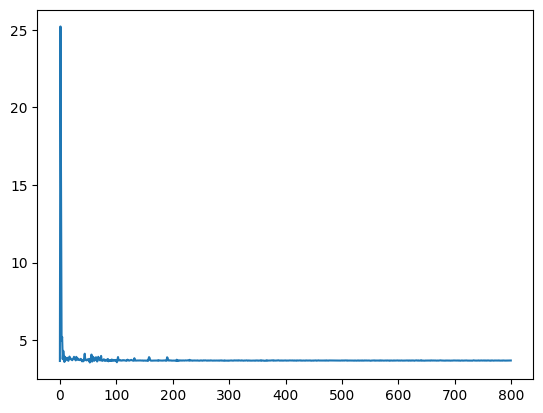

In [37]:
plt.plot(range(len(loss_hist)), loss_hist)
plt.show()

In [26]:
# 多层神经网络模型
model2 = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(8192, 16384),
    nn.BatchNorm1d(16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024, 40)
).to(device)  # 模型结构搬到GPU内存中

In [27]:
print(model2)

Sequential(
  (0): Linear(in_features=4096, out_features=8192, bias=True)
  (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=8192, out_features=16384, bias=True)
  (5): BatchNorm1d(16384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=16384, out_features=1024, bias=True)
  (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=1024, out_features=40, bias=True)
)


In [29]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)

In [30]:
loss_hist2 = []
model2.train()
for i in range(20):
    for img,lbl in dataloader:
        img,lbl = img.to(device), lbl.to(device)  # 数据和模型在同一个设备端
        result = model2(img)
        loss = criterion2(result, lbl)
        loss.backward()
        optimizer2.step()
        optimizer2.zero_grad()

        loss_hist2.append(loss.item())
        print(f'epoch:{i+1} loss:{loss.item():.4f}')

epoch:1 loss:4.2206
epoch:1 loss:3.9489
epoch:1 loss:3.6720
epoch:1 loss:4.4091
epoch:1 loss:3.6626
epoch:1 loss:3.9065
epoch:1 loss:3.8094
epoch:1 loss:3.2936
epoch:1 loss:4.1052
epoch:1 loss:3.4481
epoch:1 loss:3.5662
epoch:1 loss:3.6251
epoch:1 loss:3.8917
epoch:1 loss:4.4372
epoch:1 loss:3.5692
epoch:1 loss:3.2644
epoch:1 loss:3.5584
epoch:1 loss:3.6291
epoch:1 loss:3.6615
epoch:1 loss:4.3247
epoch:1 loss:3.5802
epoch:1 loss:3.8404
epoch:1 loss:3.9157
epoch:1 loss:3.3703
epoch:1 loss:3.7335
epoch:1 loss:3.4521
epoch:1 loss:3.2538
epoch:1 loss:3.4799
epoch:1 loss:2.5341
epoch:1 loss:3.4469
epoch:1 loss:2.6678
epoch:1 loss:3.3528
epoch:1 loss:2.6588
epoch:1 loss:2.8704
epoch:1 loss:2.7393
epoch:1 loss:3.5937
epoch:1 loss:3.2767
epoch:1 loss:2.5033
epoch:1 loss:2.7833
epoch:1 loss:2.7687
epoch:2 loss:2.2348
epoch:2 loss:2.3261
epoch:2 loss:2.7927
epoch:2 loss:2.3785
epoch:2 loss:2.3370
epoch:2 loss:2.0665
epoch:2 loss:2.4125
epoch:2 loss:2.5752
epoch:2 loss:2.1255
epoch:2 loss:3.0098


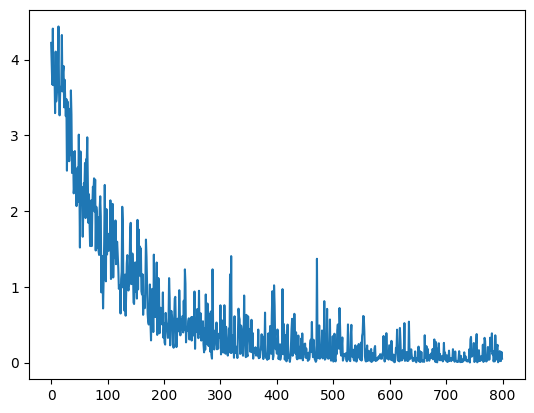

In [32]:
plt.plot(range(len(loss_hist2)), loss_hist2)
plt.show()